# Assignment 5 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [1]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [2]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [3]:
# word net installation:

# unmark if you want to use and need to install
!pip install wn
!python -m wn download omw-he:1.4


[notice] A new release of pip is available: 23.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip

Cached file found: C:\Users\Maor\.wn_data\downloads\7ecf10e89326bc0ac26ad94b40fe60a7b6ac3302

Checking C:\Users\Maor\AppData\Local\Temp\tmp_7i8cme1\omw-he\omw-he.xml
Skipping omw-he:1.4 (Hebrew Wordnet); already added



In [4]:
# word net import:

# unmark if you want to use:
#import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [5]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
#!pip install hebrew_tokenizer

In [6]:
# Hebrew tokenizer import:

# unmark if you want to use:
import hebrew_tokenizer as ht

c:\Users\Maor\Desktop\HIT - לימודים\'קורסים שנה ב\'סמסטר ב\למידת מכונה\תרגילי הגשה (למידת מכונה)\תרגיל הגשה 5 (למידת מכונה)


### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [7]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [8]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [9]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

# <u>Step 1: Tokenization</u>

This is the first stage of our mini-project. Our goal is to preprocess each story in the corpus.<br/>
We are going to normalize each story and divide it into tokens in Hebrew only, with each word/token separated from the other by a single whitespace.<br/>
It is done to ease the vectorization process.

<u><b>For Example:</b></u>
* ב.ע.מ. -> בעמ
* דוא"ל -> דואל
* שלום, עולם. -> שלום עולם

## Step 1.1: Define A Preprocessing Function

<u>function name</u>: <b>preprocess_text</b><br/>

------------

<pre>
input parameters:
- hebrew_text - a text/story written in <code>Hebrew</code>
------------
The function is going to return a regulated version of the <code>hebrew_text</code>, 
    that contains only Hebrew words, seperated by a single whitespace. </pre>
    
------------


In [10]:
def preprocess_text(hebrew_text):
    tokens = ht.tokenize(hebrew_text)
    return ' '.join([token[1] for token in tokens if (token[0] == 'HEBREW') and (len(token[1]) > 1)])

## Step 1.2: Apply The Preprocessing Function Onto <code>df_train</code>



In [11]:
df_train_tokenized = df_train.copy()
df_train_tokenized['story'] = df_train_tokenized['story'].apply(preprocess_text)

## Step 1.3: Observe Changes

In [12]:
pd.DataFrame({
    'original_story': df_train['story'],
    'tokenized_story': df_train_tokenized['story']}).head(10)

,original_story,tokenized_story
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",כשחבר הזמין אותי לחול לא באמת חשבתי שזה יקרה פ...
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",כשהייתי ילד מטוסים היה הדבר שהכי ריתק אותי בתו...
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכים...
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,לפני חודשים טסתי לרומא למשך שבוע טסתי במטוס אל...
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,השנה התחלנו שיפוץ בדירה שלנו בתל אביב הדירה הי...
8,עד לפני כמה חודשים אני הייתי בטוח שכל חיי אהיה...,עד לפני כמה חודשים אני הייתי בטוח שכל חיי אהיה...
9,"בן זוגי חגג יום הולדת, ורציתי להפתיע אותו ולסג...",בן זוגי חגג יום הולדת ורציתי להפתיע אותו ולסגו...


# <u>Step 2: Modeling and Vectorization</u>

**This is the biggest part of the assignment**.</br>
In this section we will train three different models:
* MultinomialNB
* LinearSVC
* Decision Tree

We will pair each model with the two vectorizer tools we learned in class:
* The CountVectorizer
* The TfidfVectorizer

For each <code>model and vectorizer pair</code> we will perform several tests using <code>GridSearchCV</code> which will help us (as much as possible)</br>
to find the best Hyperparameters that will lead to the highest Average_f1 result.

Each <code>model and vectorizer pair</code> will receive **at least 2 tests** and **at most 4 tests**.</br> 
At the end of each test</br> we will list the <code>Average_f1</code> and <code>Run-Time</code> results,</br>
draw conclusions and try to improve them in the next test (mainly the <code>Average_f1</code>).

# <u>Step 2.1: MultinomialNB - Testing:</u>

## Step 2.1.1: MultinomialNB and CountVectorizer - Testing:

### Test 1:

In [54]:
# Define pipeline
pipeline_train = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

# Define parameter grid for grid search
param_grid = [
    {
        'vectorizer': [CountVectorizer()],
        'vectorizer__max_features': [10_000, 30_000],
        'vectorizer__ngram_range': [(1,1), (1,2)],
        'vectorizer__min_df': [1, 2, 3],
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.1, 0.5, 1, 5]
    }
]

# Perform grid search
grid_search = GridSearchCV(pipeline_train, param_grid=param_grid, scoring='f1_macro', cv=5)
grid_search.fit(df_train_tokenized['story'], df_train_tokenized['gender'])

# Print best parameter combination and corresponding score
print(grid_search.best_params_)
print(grid_search.best_score_)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('classifier', MultinomialNB())]),
             param_grid=[{'classifier': [MultinomialNB(alpha=0.5)],
                          'classifier__alpha': [0.1, 0.5, 1, 5],
                          'vectorizer': [CountVectorizer(max_features=10000,
                                                         min_df=3,
                                                         ngram_range=(1, 2))],
                          'vectorizer__max_features': [10000, 30000],
                          'vectorizer__min_df': [1, 2, 3],
                          'vectorizer__ngram_range': [(1, 1), (1, 2)]}],
             scoring='f1_macro')

{'classifier': MultinomialNB(alpha=0.5), 'classifier__alpha': 0.5, 'vectorizer': CountVectorizer(max_features=10000, min_df=3, ngram_range=(1, 2)), 'vectorizer__max_features': 10000, 'vectorizer__min_df': 3, 'vectorizer__ngram_range': (1, 2)}
0.6770543755271181


### Test 1 Results:
* Average_f1 ≈ 0.677
* Run-Time ≈ 2 minutes

Let's see if can increase <code>Average_f1</code> without increasing too much the <code>Run-Time</code>.</br>
Let's see what happens if we increase the <code>cv value</code> to 7.

### Test 2:

In [56]:
# Define pipeline
pipeline_train = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

# Define parameter grid for grid search
param_grid = [
    {
        'vectorizer': [CountVectorizer()],
        'vectorizer__max_features': [10_000, 30_000],
        'vectorizer__ngram_range': [(1,1), (1,2)],
        'vectorizer__min_df': [1, 2, 3],
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.1, 0.5, 1, 5]
    }
]

# Perform grid search
grid_search = GridSearchCV(pipeline_train, param_grid=param_grid, scoring='f1_macro', cv=7)
grid_search.fit(df_train_tokenized['story'], df_train_tokenized['gender'])

# Print best parameter combination and corresponding score
print(grid_search.best_params_)
print(grid_search.best_score_)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('classifier', MultinomialNB())]),
             param_grid=[{'classifier': [MultinomialNB(alpha=0.5)],
                          'classifier__alpha': [0.1, 0.5, 1, 5],
                          'vectorizer': [CountVectorizer(max_features=10000,
                                                         min_df=3,
                                                         ngram_range=(1, 2))],
                          'vectorizer__max_features': [10000, 30000],
                          'vectorizer__min_df': [1, 2, 3],
                          'vectorizer__ngram_range': [(1, 1), (1, 2)]}],
             scoring='f1_macro')

{'classifier': MultinomialNB(alpha=0.5), 'classifier__alpha': 0.5, 'vectorizer': CountVectorizer(max_features=10000, min_df=3, ngram_range=(1, 2)), 'vectorizer__max_features': 10000, 'vectorizer__min_df': 3, 'vectorizer__ngram_range': (1, 2)}
0.681150290813224


### Test 2 Results:
* Average_f1 ≈ 0.681
* Run-Time ≈ 2.50 minutes

Seems like increasing the <code>cv value</code> is the way to go!
Let's try that again, only this time see what happens if we increase the <code>cv value</code> to 10.

### Test 3:

In [57]:
# Define pipeline
pipeline_train = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

# Define parameter grid for grid search
param_grid = [
    {
        'vectorizer': [CountVectorizer()],
        'vectorizer__max_features': [10_000, 30_000],
        'vectorizer__ngram_range': [(1,1), (1,2)],
        'vectorizer__min_df': [1, 2, 3],
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.1, 0.5, 1, 5]
    }
]

# Perform grid search
grid_search = GridSearchCV(pipeline_train, param_grid=param_grid, scoring='f1_macro', cv=10)
grid_search.fit(df_train_tokenized['story'], df_train_tokenized['gender'])

# Print best parameter combination and corresponding score
print(grid_search.best_params_)
print(grid_search.best_score_)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('classifier', MultinomialNB())]),
             param_grid=[{'classifier': [MultinomialNB(alpha=0.5)],
                          'classifier__alpha': [0.1, 0.5, 1, 5],
                          'vectorizer': [CountVectorizer(max_features=10000,
                                                         ngram_range=(1, 2))],
                          'vectorizer__max_features': [10000, 30000],
                          'vectorizer__min_df': [1, 2, 3],
                          'vectorizer__ngram_range': [(1, 1), (1, 2)]}],
             scoring='f1_macro')

{'classifier': MultinomialNB(alpha=0.5), 'classifier__alpha': 0.5, 'vectorizer': CountVectorizer(max_features=10000, ngram_range=(1, 2)), 'vectorizer__max_features': 10000, 'vectorizer__min_df': 1, 'vectorizer__ngram_range': (1, 2)}
0.6958937445907581


### Test 3 Results:
* Average_f1 ≈ 0.695
* Run-Time ≈ 4 minutes

On the one hand, we managed to raise the <code>Average_f1</code> by approximately 0.01, on the other hand, we are starting to get a little carried away with time...</br>
Let's try to see if it is possible, on the one hand, to get around 0.69, and on the other hand, to keep a time of about 4 minutes.</br>
We will add an additional parameter <code>max_df</code> to the grid search and at the same time we will remove some values that in the previous tests</br>
didn't contribute to the best <code>Average_f1 score</code> at all, in order to stay at approximately 4 min <code>Run-Time</code>.

### Test 4:

In [62]:
# Define pipeline
pipeline_train = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

# Define parameter grid for grid search
param_grid = [
    {
        'vectorizer': [CountVectorizer()],
        'vectorizer__max_features': [10_000, 30_000],
        'vectorizer__ngram_range': [(1,1), (1,2)],
        'vectorizer__min_df': [1, 2, 3],
        'vectorizer__max_df': [0.7, 0.9],
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.1, 0.5]
    }
]

# Perform grid search
grid_search = GridSearchCV(pipeline_train, param_grid=param_grid, scoring='f1_macro', cv=10)
grid_search.fit(df_train_tokenized['story'], df_train_tokenized['gender'])

# Print best parameter combination and corresponding score
print(grid_search.best_params_)
print(grid_search.best_score_)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('classifier', MultinomialNB())]),
             param_grid=[{'classifier': [MultinomialNB(alpha=0.5)],
                          'classifier__alpha': [0.1, 0.5],
                          'vectorizer': [CountVectorizer(max_df=0.7,
                                                         max_features=10000,
                                                         min_df=3,
                                                         ngram_range=(1, 2))],
                          'vectorizer__max_df': [0.7, 0.9],
                          'vectorizer__max_features': [10000, 30000],
                          'vectorizer__min_df': [1, 2, 3],
                          'vectorizer__ngram_range': [(1, 1), (1, 2)]}],
             scoring='f1_macro')

{'classifier': MultinomialNB(alpha=0.5), 'classifier__alpha': 0.5, 'vectorizer': CountVectorizer(max_df=0.7, max_features=10000, min_df=3, ngram_range=(1, 2)), 'vectorizer__max_df': 0.7, 'vectorizer__max_features': 10000, 'vectorizer__min_df': 3, 'vectorizer__ngram_range': (1, 2)}
0.7036388457099891


### Test 4 Results:
* Average_f1 ≈ 0.703
* Run-Time ≈ 4 minutes

We managed to raise the <code>Average_f1</code> to approximately 0.7 while keeping the <code>Run-Time</code> at approximately 4 min!!!</br>
I believe that at this point, we can't improve the <code>Average_f1</code> without reaching a significantly larger <code>Run-Time</code>,</br>
therefore, it might be best to stop at this point and move to the next (Vectorizer, Model).

## Step 2.1.1: MultinomialNB and CountVectorizer - Conclusions:

| Test no.              | Average_f1 | Run-Time(minutes) |
|-----------------------|------------|-------------------|
| 1                     | 0.677      | 2                 |  
| 2                     | 0.681      | 2.50              |
| 3                     | 0.695      | 4                 | 
| <code>4</code>        | 0.703      | 4                 |

</br>

## Step 2.1.2: MultinomialNB and TfidfVectorizer - Testing:

### Test 1:

In [64]:
# Define pipeline
pipeline_train = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

# Define parameter grid for grid search
param_grid = [
    {
        'vectorizer': [TfidfVectorizer()],
        'vectorizer__max_features': [10_000, 30_000],
        'vectorizer__ngram_range': [(1,1), (1,2)],
        'vectorizer__norm': ['l1', 'l2'],
        'vectorizer__min_df': [1, 2, 3],
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.1, 0.5, 1, 5]
    }
]

# Perform grid search
grid_search = GridSearchCV(pipeline_train, param_grid=param_grid, scoring='f1_macro', cv=5)
grid_search.fit(df_train_tokenized['story'], df_train_tokenized['gender'])

# Print best parameter combination and corresponding score
print(grid_search.best_params_)
print(grid_search.best_score_)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('classifier', MultinomialNB())]),
             param_grid=[{'classifier': [MultinomialNB(alpha=0.1)],
                          'classifier__alpha': [0.1, 0.5, 1, 5],
                          'vectorizer': [TfidfVectorizer(max_features=10000,
                                                         min_df=3,
                                                         ngram_range=(1, 2))],
                          'vectorizer__max_features': [10000, 30000],
                          'vectorizer__min_df': [1, 2, 3],
                          'vectorizer__ngram_range': [(1, 1), (1, 2)],
                          'vectorizer__norm': ['l1', 'l2']}],
             scoring='f1_macro')

{'classifier': MultinomialNB(alpha=0.1), 'classifier__alpha': 0.1, 'vectorizer': TfidfVectorizer(max_features=10000, min_df=3, ngram_range=(1, 2)), 'vectorizer__max_features': 10000, 'vectorizer__min_df': 3, 'vectorizer__ngram_range': (1, 2), 'vectorizer__norm': 'l2'}
0.5124751507957711


### Test 1 Results:
* Average_f1 ≈ 0.512
* Run-Time ≈ 4 minutes

Compared to the CountVectorizer, seems like we unfortunately got really bad results, both in Average_f1 and Run-Time.</br>
We'll try a different approach, changing both the <code>cv value</code> and the <code>hyperparameters values</code> and hope for a better result...

### Test 2:

In [65]:
# Define pipeline
pipeline_train = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

# Define parameter grid for grid search
param_grid = [
    {
        'vectorizer': [TfidfVectorizer()],
        'vectorizer__max_features': [10_000, 30_000],
        'vectorizer__ngram_range': [(1,1), (1,2)],
        'vectorizer__norm': ['l1', 'l2'],
        'vectorizer__min_df': [1, 3, 5],
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.1, 0.3, 0.7]
    }
]

# Perform grid search
grid_search = GridSearchCV(pipeline_train, param_grid=param_grid, scoring='f1_macro', cv=10)
grid_search.fit(df_train_tokenized['story'], df_train_tokenized['gender'])

# Print best parameter combination and corresponding score
print(grid_search.best_params_)
print(grid_search.best_score_)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('classifier', MultinomialNB())]),
             param_grid=[{'classifier': [MultinomialNB(alpha=0.1)],
                          'classifier__alpha': [0.1, 0.3, 0.7],
                          'vectorizer': [TfidfVectorizer(max_features=10000,
                                                         min_df=3,
                                                         ngram_range=(1, 2))],
                          'vectorizer__max_features': [10000, 30000],
                          'vectorizer__min_df': [1, 3, 5],
                          'vectorizer__ngram_range': [(1, 1), (1, 2)],
                          'vectorizer__norm': ['l1', 'l2']}],
             scoring='f1_macro')

{'classifier': MultinomialNB(alpha=0.1), 'classifier__alpha': 0.1, 'vectorizer': TfidfVectorizer(max_features=10000, min_df=3, ngram_range=(1, 2)), 'vectorizer__max_features': 10000, 'vectorizer__min_df': 3, 'vectorizer__ngram_range': (1, 2), 'vectorizer__norm': 'l2'}
0.5256647948249


### Test 2 Results:
* Average_f1 ≈ 0.525
* Run-Time ≈ 6 minutes

Once again unfortunately we got really bad results, both in Average_f1 and Run-Time, therefore we move on to the next model...</br>

## Step 2.1.2: MultinomialNB and TfidfVectorizer - Conclusion:

| Test no.              | Average_f1 | Run-Time(minutes) |
|-----------------------|------------|-------------------|
| 1                     | 0.512      | 4                 |  
| 2                     | 0.525      | 6                 |

</br>

# <u>Step 2.1: MultinomialNB - Conclusion:</u>

| Vectorizer                                | Best Average_f1 | Run-Time(minutes) |
|-------------------------------------------|-----------------|-------------------|
| <code>**CountVectorizer**</code>          | 0.703           | 4                 |  
| TfidfVectorizer                           | 0.525           | 6                 |

</br></br>

# <u>Step 2.2: LinearSVC - Testing:</u>

## Step 2.2.1: LinearSVC and CountVectorizer - Testing:

### Test 1:

In [66]:
# Define pipeline
pipeline_train = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LinearSVC())
])

# Define parameter grid for grid search
param_grid = [
    {
        'vectorizer': [CountVectorizer()],
        'vectorizer__max_features': [10_000, 30_000],
        'vectorizer__ngram_range': [(1,1), (1,2)],
        'vectorizer__min_df': [1, 3],
        'classifier': [LinearSVC()],
        'classifier__C': [0.1, 1, 10, 50],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__loss': ['hinge', 'squared_hinge']
    }
]

# Perform grid search
grid_search = GridSearchCV(pipeline_train, param_grid=param_grid, scoring='f1_macro', cv=5)
grid_search.fit(df_train_tokenized['story'], df_train_tokenized['gender'])

# Print best parameter combination and corresponding score
print(grid_search.best_params_)
print(grid_search.best_score_)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('classifier', LinearSVC())]),
             param_grid=[{'classifier': [LinearSVC(C=50, loss='hinge')],
                          'classifier__C': [0.1, 1, 10, 50],
                          'classifier__loss': ['hinge', 'squared_hinge'],
                          'classifier__penalty': ['l1', 'l2'],
                          'vectorizer': [CountVectorizer(max_features=30000)],
                          'vectorizer__max_features': [10000, 30000],
                          'vectorizer__min_df': [1, 3],
                          'vectorizer__ngram_range': [(1, 1), (1, 2)]}],
             scoring='f1_macro')

{'classifier': LinearSVC(C=50, loss='hinge'), 'classifier__C': 50, 'classifier__loss': 'hinge', 'classifier__penalty': 'l2', 'vectorizer': CountVectorizer(max_features=30000), 'vectorizer__max_features': 30000, 'vectorizer__min_df': 1, 'vectorizer__ngram_range': (1, 1)}
0.6926338323467011


### Test 1 Results:
* Average_f1 ≈ 0.693
* Run-Time ≈ 5.40 minutes

Wow! Compared to <code>MultinomialNB-CountVectorizer</code> first tests, LinearSVC performs extraordinary well, nearly beating <code>MultinomialNB-CountVectorizer fourh test!</code></br>
However, LinearSVC seems to take a bit more time... therefore we need to be careful not to increase it to much.</br>
Let's see what happens if we increase the <code>cv value</code> to 7 and remove some of the values in hyperparameters in order to stay around 5 minutes <code>Run-time</code>.

### Test 2:

In [68]:
# Define pipeline
pipeline_train = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LinearSVC())
])

# Define parameter grid for grid search
param_grid = [
    {
        'vectorizer': [CountVectorizer()],
        'vectorizer__max_features': [10_000, 30_000],
        'vectorizer__ngram_range': [(1,1), (1,2)],
        'vectorizer__min_df': [1, 3],
        'classifier': [LinearSVC()],
        'classifier__C': [1, 10, 50],
        'classifier__penalty': ['l2'],
        'classifier__loss': ['hinge', 'squared_hinge']
    }
]

# Perform grid search
grid_search = GridSearchCV(pipeline_train, param_grid=param_grid, scoring='f1_macro', cv=7)
grid_search.fit(df_train_tokenized['story'], df_train_tokenized['gender'])

# Print best parameter combination and corresponding score
print(grid_search.best_params_)
print(grid_search.best_score_)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('classifier', LinearSVC())]),
             param_grid=[{'classifier': [LinearSVC(C=1, loss='hinge')],
                          'classifier__C': [1, 10, 50],
                          'classifier__loss': ['hinge', 'squared_hinge'],
                          'classifier__penalty': ['l2'],
                          'vectorizer': [CountVectorizer(max_features=10000,
                                                         min_df=3,
                                                         ngram_range=(1, 2))],
                          'vectorizer__max_features': [10000, 30000],
                          'vectorizer__min_df': [1, 3],
                          'vectorizer__ngram_range': [(1, 1), (1, 2)]}],
             scoring='f1_macro')

{'classifier': LinearSVC(C=1, loss='hinge'), 'classifier__C': 1, 'classifier__loss': 'hinge', 'classifier__penalty': 'l2', 'vectorizer': CountVectorizer(max_features=10000, min_df=3, ngram_range=(1, 2)), 'vectorizer__max_features': 10000, 'vectorizer__min_df': 3, 'vectorizer__ngram_range': (1, 2)}
0.6916455235929575


### Test 2 Results:
* Average_f1 ≈ 0.691
* Run-Time ≈ 3 minutes

Alright, we managed to save up to 2 minutes this time, but got slightly worse <code>Average_f1</code> compared to the first test...</br>
Might be due to the lack of <code>max_df</code>.
Let's add it in the third test!

### Test 3:

In [69]:
# Define pipeline
pipeline_train = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LinearSVC())
])

# Define parameter grid for grid search
param_grid = [
    {
        'vectorizer': [CountVectorizer()],
        'vectorizer__max_features': [10_000, 30_000],
        'vectorizer__ngram_range': [(1,1), (1,2)],
        'vectorizer__min_df': [1, 3],
        'vectorizer__max_df': [0.7, 0.9],
        'classifier': [LinearSVC()],
        'classifier__C': [1, 10, 50],
        'classifier__penalty': ['l2'],
        'classifier__loss': ['hinge', 'squared_hinge']
    }
]

# Perform grid search
grid_search = GridSearchCV(pipeline_train, param_grid=param_grid, scoring='f1_macro', cv=7)
grid_search.fit(df_train_tokenized['story'], df_train_tokenized['gender'])

# Print best parameter combination and corresponding score
print(grid_search.best_params_)
print(grid_search.best_score_)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('classifier', LinearSVC())]),
             param_grid=[{'classifier': [LinearSVC(C=10)],
                          'classifier__C': [1, 10, 50],
                          'classifier__loss': ['hinge', 'squared_hinge'],
                          'classifier__penalty': ['l2'],
                          'vectorizer': [CountVectorizer(max_df=0.9,
                                                         max_features=30000,
                                                         min_df=3,
                                                         ngram_range=(1, 2))],
                          'vectorizer__max_df': [0.7, 0.9],
                          'vectorizer__max_features': [10000, 30000],
                          'vectorizer__min_df': [1, 3],
                          'vectorizer__ngram_range': [(1, 1), (1, 2)]}],
             scoring='f1_macro')

{'classifier': LinearSVC(C=10), 'classifier__C': 10, 'classifier__loss': 'squared_hinge', 'classifier__penalty': 'l2', 'vectorizer': CountVectorizer(max_df=0.9, max_features=30000, min_df=3, ngram_range=(1, 2)), 'vectorizer__max_df': 0.9, 'vectorizer__max_features': 30000, 'vectorizer__min_df': 3, 'vectorizer__ngram_range': (1, 2)}
0.6851530873882383


### Test 3 Results:
* Average_f1 ≈ 0.685
* Run-Time ≈ 7 minutes

mmmm.... Seems we got worse both on <code>Run-Time</code> and <code>Average_f1</code>.</br>
Maybe bring the <code>cv value</code> back to 5...?

### Test 4:

In [75]:
# Define pipeline
pipeline_train = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LinearSVC())
])

# Define parameter grid for grid search
param_grid = [
    {
        'vectorizer': [CountVectorizer()],
        'vectorizer__max_features': [40_000, 50_000],
        'vectorizer__ngram_range': [(1,1), (1,2)],
        'vectorizer__min_df': [1, 3],
        'vectorizer__max_df': [0.7, 0.9],
        'classifier': [LinearSVC()],
        'classifier__C': [1, 10],
        'classifier__penalty': ['l2'],
        'classifier__loss': ['squared_hinge']
    }
]

# Perform grid search
grid_search = GridSearchCV(pipeline_train, param_grid=param_grid, scoring='f1_macro', cv=5)
grid_search.fit(df_train_tokenized['story'], df_train_tokenized['gender'])

# Print best parameter combination and corresponding score
print(grid_search.best_params_)
print(grid_search.best_score_)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('classifier', LinearSVC())]),
             param_grid=[{'classifier': [LinearSVC(C=1)],
                          'classifier__C': [1, 10],
                          'classifier__loss': ['squared_hinge'],
                          'classifier__penalty': ['l2'],
                          'vectorizer': [CountVectorizer(max_df=0.9,
                                                         max_features=40000,
                                                         min_df=3,
                                                         ngram_range=(1, 2))],
                          'vectorizer__max_df': [0.7, 0.9],
                          'vectorizer__max_features': [40000, 50000],
                          'vectorizer__min_df': [1, 3],
                          'vectorizer__ngram_range': [(1, 1), (1, 2)]}],
             scoring='f1_macro')

{'classifier': LinearSVC(C=1), 'classifier__C': 1, 'classifier__loss': 'squared_hinge', 'classifier__penalty': 'l2', 'vectorizer': CountVectorizer(max_df=0.9, max_features=40000, min_df=3, ngram_range=(1, 2)), 'vectorizer__max_df': 0.9, 'vectorizer__max_features': 40000, 'vectorizer__min_df': 3, 'vectorizer__ngram_range': (1, 2)}
0.7020032247542748


### Test 4 Results:
* Average_f1 ≈ 0.702
* Run-Time ≈ 2 minutes

Splendid! we increased <code>Average_f1</code> and reduced the <code>Run-time</code> to reasonably values!</br>
Seems like there isn't much else to add or do but to continue to the next vectorizer tool!

## Step 2.2.1: LinearSVC and CountVectorizer - Conclusion:

| Test no.              | Average_f1 | Run-Time(minutes) |
|-----------------------|------------|-------------------|
| 1                     | 0.693      | 5.40              |  
| 2                     | 0.691      | 3                 |
| 3                     | 0.685      | 7                 | 
| <code>4</code>        | 0.702      | 2                 |

</br>

## Step 2.2.2: LinearSVC and TfidfVectorizer - Testing:

### Test 1:

In [13]:
# Define pipeline
pipeline_train = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LinearSVC())
])

# Define parameter grid for grid search
param_grid = [
    {
        'vectorizer': [TfidfVectorizer()],
        'vectorizer__max_features': [10_000, 30_000],
        'vectorizer__ngram_range': [(1,1), (1,2)],
        'vectorizer__min_df': [1, 3],
        'classifier': [LinearSVC()],
        'classifier__C': [0.1, 1, 10, 50],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__loss': ['hinge', 'squared_hinge']
    }
]

# Perform grid search
grid_search = GridSearchCV(pipeline_train, param_grid=param_grid, scoring='f1_macro', cv=5)
grid_search.fit(df_train_tokenized['story'], df_train_tokenized['gender'])

# Print best parameter combination and corresponding score
print(grid_search.best_params_)
print(grid_search.best_score_)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('classifier', LinearSVC())]),
             param_grid=[{'classifier': [LinearSVC(C=50, loss='hinge')],
                          'classifier__C': [0.1, 1, 10, 50],
                          'classifier__loss': ['hinge', 'squared_hinge'],
                          'classifier__penalty': ['l1', 'l2'],
                          'vectorizer': [TfidfVectorizer(max_features=10000,
                                                         ngram_range=(1, 2))],
                          'vectorizer__max_features': [10000, 30000],
                          'vectorizer__min_df': [1, 3],
                          'vectorizer__ngram_range': [(1, 1), (1, 2)]}],
             scoring='f1_macro')

{'classifier': LinearSVC(C=50, loss='hinge'), 'classifier__C': 50, 'classifier__loss': 'hinge', 'classifier__penalty': 'l2', 'vectorizer': TfidfVectorizer(max_features=10000, ngram_range=(1, 2)), 'vectorizer__max_features': 10000, 'vectorizer__min_df': 1, 'vectorizer__ngram_range': (1, 2)}
0.6654781121964962


### Test 1 Results:
* Average_f1 ≈ 0.665
* Run-Time ≈ 5.20 minutes

Well, it didn't start as well as the CountVectorizer. </br>
Maybe we should add more bigger values to the <code>C value</code> before increasing the <code>cv value</code>.</br>
We should also change a bit and also reduce the values for the <code>max_features</code> and <code>min_df</code></br>
to see if we can indeed get a better <code>Average_f1</code> and <code>Run-Time</code>. 

### Test 2:

In [14]:
# Define pipeline
pipeline_train = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LinearSVC())
])

# Define parameter grid for grid search
param_grid = [
    {
        'vectorizer': [TfidfVectorizer()],
        'vectorizer__max_features': [10_000, 20_000],
        'vectorizer__ngram_range': [(1,1), (1,2)],
        'vectorizer__min_df': [1, 3],
        'classifier': [LinearSVC()],
        'classifier__C': [20, 50, 70, 90],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__loss': ['hinge', 'squared_hinge']
    }
]

# Perform grid search
grid_search = GridSearchCV(pipeline_train, param_grid=param_grid, scoring='f1_macro', cv=5)
grid_search.fit(df_train_tokenized['story'], df_train_tokenized['gender'])

# Print best parameter combination and corresponding score
print(grid_search.best_params_)
print(grid_search.best_score_)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('classifier', LinearSVC())]),
             param_grid=[{'classifier': [LinearSVC(C=20, loss='hinge')],
                          'classifier__C': [20, 50, 70, 90],
                          'classifier__loss': ['hinge', 'squared_hinge'],
                          'classifier__penalty': ['l1', 'l2'],
                          'vectorizer': [TfidfVectorizer(max_features=10000,
                                                         min_df=3)],
                          'vectorizer__max_features': [10000, 20000],
                          'vectorizer__min_df': [1, 3],
                          'vectorizer__ngram_range': [(1, 1), (1, 2)]}],
             scoring='f1_macro')

{'classifier': LinearSVC(C=20, loss='hinge'), 'classifier__C': 20, 'classifier__loss': 'hinge', 'classifier__penalty': 'l2', 'vectorizer': TfidfVectorizer(max_features=10000, min_df=3), 'vectorizer__max_features': 10000, 'vectorizer__min_df': 3, 'vectorizer__ngram_range': (1, 1)}
0.6656577374227762


### Test 2 Results:
* Average_f1 ≈ 0.665
* Run-Time ≈ 5.40 minutes

Only minor changes compared to the first test.</br>
Maybe we should center the <code>C value</code> around 20...</br>
Let's also try now to increase the <code>cv value</code> to 7.</br>
Let's also add and remove some of the values in the other hyperparameters.</br>
Finally, let's add in the <code>max_df value</code>.

### Test 3:

In [15]:
# Define pipeline
pipeline_train = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LinearSVC())
])

# Define parameter grid for grid search
param_grid = [
    {
        'vectorizer': [TfidfVectorizer()],
        'vectorizer__max_features': [10_000, 20_000],
        'vectorizer__ngram_range': [(1,1), (1,2)],
        'vectorizer__min_df': [1, 3],
        'vectorizer__max_df': [0.7, 0.9],
        'classifier': [LinearSVC()],
        'classifier__C': [15, 20, 25],
        'classifier__penalty': ['l2'],
        'classifier__loss': ['hinge', 'squared_hinge']
    }
]

# Perform grid search
grid_search = GridSearchCV(pipeline_train, param_grid=param_grid, scoring='f1_macro', cv=7)
grid_search.fit(df_train_tokenized['story'], df_train_tokenized['gender'])

# Print best parameter combination and corresponding score
print(grid_search.best_params_)
print(grid_search.best_score_)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('classifier', LinearSVC())]),
             param_grid=[{'classifier': [LinearSVC(C=25, loss='hinge')],
                          'classifier__C': [15, 20, 25],
                          'classifier__loss': ['hinge', 'squared_hinge'],
                          'classifier__penalty': ['l2'],
                          'vectorizer': [TfidfVectorizer(max_df=0.9,
                                                         max_features=10000,
                                                         min_df=3)],
                          'vectorizer__max_df': [0.7, 0.9],
                          'vectorizer__max_features': [10000, 20000],
                          'vectorizer__min_df': [1, 3],
                          'vectorizer__ngram_range': [(1, 1), (1, 2)]}],
             scoring='f1_macro')

{'classifier': LinearSVC(C=25, loss='hinge'), 'classifier__C': 25, 'classifier__loss': 'hinge', 'classifier__penalty': 'l2', 'vectorizer': TfidfVectorizer(max_df=0.9, max_features=10000, min_df=3), 'vectorizer__max_df': 0.9, 'vectorizer__max_features': 10000, 'vectorizer__min_df': 3, 'vectorizer__ngram_range': (1, 1)}
0.6712306236565272


### Test 3 Results:
* Average_f1 ≈ 0.671
* Run-Time ≈ 7 minutes

Slightly increase at the <code>Average_f1</code> value.</br>
Seems like increasing the <code>cv value</code> might be the way to go,</br>
but we should also reduce some of the other values in order to reduce the <code>Run-Time</code>.

### Test 4:

In [16]:
# Define pipeline
pipeline_train = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LinearSVC())
])

# Define parameter grid for grid search
param_grid = [
    {
        'vectorizer': [TfidfVectorizer()],
        'vectorizer__max_features': [10_000, 20_000],
        'vectorizer__ngram_range': [(1,1), (1,2)],
        'vectorizer__min_df': [1, 2, 3],
        'vectorizer__max_df': [0.7, 0.9],
        'classifier': [LinearSVC()],
        'classifier__C': [20, 25],
        'classifier__penalty': ['l2'],
        'classifier__loss': ['hinge']
    }
]

# Perform grid search
grid_search = GridSearchCV(pipeline_train, param_grid=param_grid, scoring='f1_macro', cv=10)
grid_search.fit(df_train_tokenized['story'], df_train_tokenized['gender'])

# Print best parameter combination and corresponding score
print(grid_search.best_params_)
print(grid_search.best_score_)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('classifier', LinearSVC())]),
             param_grid=[{'classifier': [LinearSVC(C=20, loss='hinge')],
                          'classifier__C': [20, 25],
                          'classifier__loss': ['hinge'],
                          'classifier__penalty': ['l2'],
                          'vectorizer': [TfidfVectorizer(max_df=0.7,
                                                         max_features=10000,
                                                         min_df=2)],
                          'vectorizer__max_df': [0.7, 0.9],
                          'vectorizer__max_features': [10000, 20000],
                          'vectorizer__min_df': [1, 2, 3],
                          'vectorizer__ngram_range': [(1, 1), (1, 2)]}],
             scoring='f1_macro')

{'classifier': LinearSVC(C=20, loss='hinge'), 'classifier__C': 20, 'classifier__loss': 'hinge', 'classifier__penalty': 'l2', 'vectorizer': TfidfVectorizer(max_df=0.7, max_features=10000, min_df=2), 'vectorizer__max_df': 0.7, 'vectorizer__max_features': 10000, 'vectorizer__min_df': 2, 'vectorizer__ngram_range': (1, 1)}
0.6733648265407998


### Test 4 Results:
* Average_f1 ≈ 0.673
* Run-Time ≈ 5 minutes

A very minor increase at the <code>Average_f1</code> value, Although we did manage to improve <code>Run-Time</code>.</br>
I don't think there is much else to add or do in order to increase the <code>Average_f1</code> for this vectorizer for this model.

## Step 2.2.1: LinearSVC and TfidfVectorizer - Conclusion:

| Test no.              | Average_f1 | Run-Time(minutes) |
|-----------------------|------------|-------------------|
| 1                     | 0.665      | 5.20              |  
| 2                     | 0.665      | 5.40              |
| 3                     | 0.671      | 7                 | 
| <code>4</code>        | 0.673      | 5                 |

</br>

# <u>Step 2.2: LinearSVC - Conclusion:</u>

| Vectorizer                                | Best Average_f1 | Run-Time(minutes) |
|-------------------------------------------|-----------------|-------------------|
| <code>**CountVectorizer**</code>          | 0.702           | 2                 |  
| TfidfVectorizer                           | 0.673           | 5                 |

</br></br>

# <u>Step 2.3: Decision Tree - Testing:</u>

## Step 2.3.1: Decision Tree and CountVectorizer - Testing:


### Test 1:

In [ ]:
# Define pipeline
pipeline_train = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', DecisionTreeClassifier())
])

# Define parameter grid for grid search
param_grid = [
    {
        'vectorizer': [CountVectorizer()],
        'vectorizer__max_features': [10_000, 30_000],
        'vectorizer__ngram_range': [(1,1), (1,2)],
        'vectorizer__min_df': [1, 2, 3],
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [5, 15, 25],
        'classifier__min_samples_split': [2, 4, 6],
        'classifier__min_samples_leaf': [1, 3, 5],
        'classifier__criterion': ['gini', 'entropy']
    }
]
# Perform grid search
grid_search = GridSearchCV(pipeline_train, param_grid=param_grid, scoring='f1_macro', cv=5)
grid_search.fit(df_train_tokenized['story'], df_train_tokenized['gender'])

# Print best parameter combination and corresponding score
print(grid_search.best_params_)
print(grid_search.best_score_)

In [21]:
# Define pipeline
pipeline_train = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', DecisionTreeClassifier())
])

# Define parameter grid for grid search
param_grid = [
    {
        'vectorizer': [CountVectorizer()],
        'vectorizer__max_features': [10_000, 30_000],
        'vectorizer__ngram_range': [(1,1), (1,2)],
        'vectorizer__min_df': [1, 2, 3],
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [5, 10],
        'classifier__min_samples_split': [2, 4],
        'classifier__criterion': ['gini', 'entropy']
    }
]
# Perform grid search
grid_search = GridSearchCV(pipeline_train, param_grid=param_grid, scoring='f1_macro', cv=5)
grid_search.fit(df_train_tokenized['story'], df_train_tokenized['gender'])

# Print best parameter combination and corresponding score
print(grid_search.best_params_)
print(grid_search.best_score_)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid=[{'classifier': [DecisionTreeClassifier(criterion='entropy',
                                                                max_depth=10,
                                                                min_samples_split=4)],
                          'classifier__criterion': ['gini', 'entropy'],
                          'classifier__max_depth': [5, 10],
                          'classifier__min_samples_split': [2, 4],
                          'vectorizer': [CountVectorizer(max_features=30000,
                                                         min_df=2)],
                          'vectorizer__max_features': [10000, 30000],
                          'vectorizer__min_df': [1, 2, 3],
                          'vectorizer__ngram_range': [(1, 1), (1, 2)]}],
             scoring='f1_macro')

{'classifier': DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=4), 'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_split': 4, 'vectorizer': CountVectorizer(max_features=30000, min_df=2), 'vectorizer__max_features': 30000, 'vectorizer__min_df': 2, 'vectorizer__ngram_range': (1, 1)}
0.5828333289675582


### Test 1 Results:
* Average_f1 ≈ 0.582
* Run-Time ≈ 5 minutes

Well, our start is unfortunately not so good.</br>
Seems like Countvectorizer and Decision Tree don't work that well with this paticulary dataset.</br>
Despite that, we should try one more test with different values to see if we can get the model to produce us a reasonable <code>Average_f1</code> value.

### Test 2:

In [22]:
# Define pipeline
pipeline_train = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', DecisionTreeClassifier())
])

# Define parameter grid for grid search
param_grid = [
    {
        'vectorizer': [CountVectorizer()],
        'vectorizer__max_features': [10_000, 30_000],
        'vectorizer__ngram_range': [(1,1), (1,2)],
        'vectorizer__min_df': [1, 2],
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [6, 10],
        'classifier__min_samples_split': [3, 4],
        'classifier__min_samples_leaf': [1, 3],
        'classifier__criterion': ['entropy']
    }
]
# Perform grid search
grid_search = GridSearchCV(pipeline_train, param_grid=param_grid, scoring='f1_macro', cv=10)
grid_search.fit(df_train_tokenized['story'], df_train_tokenized['gender'])

# Print best parameter combination and corresponding score
print(grid_search.best_params_)
print(grid_search.best_score_)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid=[{'classifier': [DecisionTreeClassifier(criterion='entropy',
                                                                max_depth=10,
                                                                min_samples_split=3)],
                          'classifier__criterion': ['entropy'],
                          'classifier__max_depth': [6, 10],
                          'classifier__min_samples_leaf': [1, 3],
                          'classifier__min_samples_split': [3, 4],
                          'vectorizer': [CountVectorizer(max_features=10000)],
                          'vectorizer__max_features': [10000, 30000],
                          'vectorizer__min_df': [1, 2],
                          'vectorizer__ngram_range': [(1, 1), (1, 2)]}],
             scoring='f1_macro')

{'classifier': DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=3), 'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 3, 'vectorizer': CountVectorizer(max_features=10000), 'vectorizer__max_features': 10000, 'vectorizer__min_df': 1, 'vectorizer__ngram_range': (1, 1)}
0.5831007906488838


### Test 2 Results:
* Average_f1 ≈ 0.583
* Run-Time ≈ 7.30 minutes

Unfortunately, we only got minor changes for larger time spent that doesn't make the cut,</br>
therefore it can be concluded that CountVectorizer and Decision Tree aren't fit for the dataset.

## Step 2.3.1: Decision Tree and CountVectorizer - Conclusion:

| Test no.              | Average_f1 | Run-Time(minutes) |
|-----------------------|------------|-------------------|
| 1                     | 0.582      | 5                 |  
| 2                     | 0.583      | 7.30              |

</br>

## Step 2.3.2: Decision Tree and TfidfVectorizer - Testing:

### Test 1:

In [23]:
# Define pipeline
pipeline_train = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', DecisionTreeClassifier())
])

# Define parameter grid for grid search
param_grid = [
    {
        'vectorizer': [TfidfVectorizer()],
        'vectorizer__max_features': [10_000, 30_000],
        'vectorizer__ngram_range': [(1,1), (1,2)],
        'vectorizer__min_df': [1, 2, 3],
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [5, 10],
        'classifier__min_samples_split': [2, 4],
        'classifier__criterion': ['gini', 'entropy']
    }
]
# Perform grid search
grid_search = GridSearchCV(pipeline_train, param_grid=param_grid, scoring='f1_macro', cv=5)
grid_search.fit(df_train_tokenized['story'], df_train_tokenized['gender'])

# Print best parameter combination and corresponding score
print(grid_search.best_params_)
print(grid_search.best_score_)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid=[{'classifier': [DecisionTreeClassifier(max_depth=10)],
                          'classifier__criterion': ['gini', 'entropy'],
                          'classifier__max_depth': [5, 10],
                          'classifier__min_samples_split': [2, 4],
                          'vectorizer': [TfidfVectorizer(max_features=30000,
                                                         min_df=3,
                                                         ngram_range=(1, 2))],
                          'vectorizer__max_features': [10000, 30000],
                          'vectorizer__min_df': [1, 2, 3],
                          'vectorizer__ngram_range': [(1, 1), (1, 2)]}],
             scoring='f1_macro')

{'classifier': DecisionTreeClassifier(max_depth=10), 'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'vectorizer': TfidfVectorizer(max_features=30000, min_df=3, ngram_range=(1, 2)), 'vectorizer__max_features': 30000, 'vectorizer__min_df': 3, 'vectorizer__ngram_range': (1, 2)}
0.6294751280010533


### Test 1 Results:
* Average_f1 ≈ 0.629
* Run-Time ≈ 5.30 minutes

This is a much better result than what we ever got with the CountVectorizer.</br>
Despite that, we should continue to see if we can still continue to improve the <code>Average_f1</code> value.</br>
Let's try to increase the <code>cv value</code> and add more value to the hyperparameters.

### Test 2:

In [27]:
# Define pipeline
pipeline_train = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', DecisionTreeClassifier())
])

# Define parameter grid for grid search
param_grid = [
    {
        'vectorizer': [TfidfVectorizer()],
        'vectorizer__max_features': [20_000, 30_000],
        'vectorizer__ngram_range': [(1,1), (1,2)],
        'vectorizer__min_df': [2, 3],
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [5, 10],
        'classifier__max_features': [100, 200],
        'classifier__min_samples_split': [2, 4],
        'classifier__min_samples_leaf': [1, 3],
        'classifier__criterion': ['gini']
    }
]
# Perform grid search
grid_search = GridSearchCV(pipeline_train, param_grid=param_grid, scoring='f1_macro', cv=7)
grid_search.fit(df_train_tokenized['story'], df_train_tokenized['gender'])

# Print best parameter combination and corresponding score
print(grid_search.best_params_)
print(grid_search.best_score_)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid=[{'classifier': [DecisionTreeClassifier(max_depth=10,
                                                                max_features=200,
                                                                min_samples_split=4)],
                          'classifier__criterion': ['gini'],
                          'classifier__max_depth': [5, 10],
                          'classifier__max_features': [100, 200],
                          'classifier__min_samples_leaf': [1, 3],
                          'classifier__min_samples_split': [2, 4],
                          'vectorizer': [TfidfVectorizer(max_features=20000,
                                                         min_df=3)],
                          'vectorizer__max_features': [20000, 30000],
                          'vectorizer__min_df': [2, 3],
                          'vectorizer__ngram_range': [(1, 1), (1, 2)]}],
             scoring='f1_macro')

{'classifier': DecisionTreeClassifier(max_depth=10, max_features=200, min_samples_split=4), 'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__max_features': 200, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 4, 'vectorizer': TfidfVectorizer(max_features=20000, min_df=3), 'vectorizer__max_features': 20000, 'vectorizer__min_df': 3, 'vectorizer__ngram_range': (1, 1)}
0.5855723897114294


### Test 2 Results:
* Average_f1 ≈ 0.585
* Run-Time ≈ 7.40 minutes

Seems like increasing the <code>cv value</code> didn't do good for our classifier.</br>
Let's decrease the <code>cv value</code> back to 5 and see if can tune more the hyperparameters.

### Test 3:

In [16]:
# Define pipeline
pipeline_train = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', DecisionTreeClassifier())
])

# Define parameter grid for grid search
param_grid = [
    {
        'vectorizer': [TfidfVectorizer()],
        'vectorizer__max_features': [10_000, 30_000],
        'vectorizer__ngram_range': [(1,1)],
        'vectorizer__min_df': [1, 2, 3],
        'vectorizer__max_df': [0.7, 0.9],
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [5, 10],
        'classifier__min_samples_split': [2, 4],
        'classifier__min_samples_leaf': [1, 3],
        'classifier__criterion': ['gini']
    }
]
# Perform grid search
grid_search = GridSearchCV(pipeline_train, param_grid=param_grid, scoring='f1_macro', cv=5)
grid_search.fit(df_train_tokenized['story'], df_train_tokenized['gender'])

# Print best parameter combination and corresponding score
print(grid_search.best_params_)
print(grid_search.best_score_)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid=[{'classifier': [DecisionTreeClassifier(max_depth=10)],
                          'classifier__criterion': ['gini'],
                          'classifier__max_depth': [5, 10],
                          'classifier__min_samples_leaf': [1, 3],
                          'classifier__min_samples_split': [2, 4],
                          'vectorizer': [TfidfVectorizer(max_df=0.9,
                                                         max_features=10000,
                                                         min_df=3)],
                          'vectorizer__max_df': [0.7, 0.9],
                          'vectorizer__max_features': [10000, 30000],
                          'vectorizer__min_df': [1, 2, 3],
                          'vectorizer__ngram_range': [(1, 1)]}],
             scoring='f1_macro')

{'classifier': DecisionTreeClassifier(max_depth=10), 'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'vectorizer': TfidfVectorizer(max_df=0.9, max_features=10000, min_df=3), 'vectorizer__max_df': 0.9, 'vectorizer__max_features': 10000, 'vectorizer__min_df': 3, 'vectorizer__ngram_range': (1, 1)}
0.6259716448970621


### Test 3 Results:
* Average_f1 ≈ 0.625
* Run-Time ≈ 3 minutes

Compared to previous tests, our <code>Run-Time</code> is much more better, but alas, We can't seem to get past 0.62</br>
in the <code>Average_f1</code>.
Let's try one more test with different values in hyperparameters and see if we can make any progress.

### Test 4:

In [18]:
# Define pipeline
pipeline_train = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', DecisionTreeClassifier())
])

# Define parameter grid for grid search
param_grid = [
    {
        'vectorizer': [TfidfVectorizer()],
        'vectorizer__max_features': [10_000, 15_000, 40_000],
        'vectorizer__ngram_range': [(1,1), (1,2)],
        'vectorizer__min_df': [1, 2, 3],
        'vectorizer__max_df': [0.9],
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [10],
        'classifier__min_samples_split': [3, 5],
        'classifier__min_samples_leaf': [2, 3],
        'classifier__criterion': ['gini']
    }
]
# Perform grid search
grid_search = GridSearchCV(pipeline_train, param_grid=param_grid, scoring='f1_macro', cv=5)
grid_search.fit(df_train_tokenized['story'], df_train_tokenized['gender'])

# Print best parameter combination and corresponding score
print(grid_search.best_params_)
print(grid_search.best_score_)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid=[{'classifier': [DecisionTreeClassifier(max_depth=10,
                                                                min_samples_leaf=2,
                                                                min_samples_split=3)],
                          'classifier__criterion': ['gini'],
                          'classifier__max_depth': [10],
                          'classifier__min_samples_leaf': [2, 3],
                          'classifier__min_samples_split': [3, 5],
                          'vectorizer': [TfidfVectorizer(max_df=0.9,
                                                         max_features=40000,
                                                         min_df=3)],
                          'vectorizer__max_df': [0.9],
                          'vectorizer__max_features': [10000, 15000, 40000],
                          'vectorizer__min_df': [1, 2, 3],
                          'vectorizer__ngram_range': [(1, 1), (1, 2)]}],
             scoring='f1_macro')

{'classifier': DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=3), 'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 3, 'vectorizer': TfidfVectorizer(max_df=0.9, max_features=40000, min_df=3), 'vectorizer__max_df': 0.9, 'vectorizer__max_features': 40000, 'vectorizer__min_df': 3, 'vectorizer__ngram_range': (1, 1)}
0.6339780010154564


### Test 4 Results:
* Average_f1 ≈ 0.633
* Run-Time ≈ 4.20 minutes

Finally, we managed to improve the <code>Average_f1</code> value, even if by a little.</br>
I don't believe there is anything more to be done to improve the <code>Average_f1</code> value.

## Step 2.3.2: Decision Tree and TfidfVectorizer - Conclusion:

| Test no.              | Average_f1 | Run-Time(minutes) |
|-----------------------|------------|-------------------|
| 1                     | 0.629      | 5.30              |  
| 2                     | 0.585      | 7.40              |
| 3                     | 0.625      | 3                 | 
| <code>4</code>        | 0.633      | 4.20              |

</br>

# <u>Step 2.3: Decision Tree - Conclusion:</u>

| Vectorizer                                | Best Average_f1 | Run-Time(minutes) |
|-------------------------------------------|-----------------|-------------------|
| CountVectorizer                           | 0.583           | 7.30              |  
| <code>**TfidfVectorizer**</code>          | 0.633           | 4.20              |

</br></br>

# <u>Step 3: Testing Conclusion:</u>

At this stage we will examine the different results we received from different models</br>
and present the best results from each model in several ways.</br>
The model & vectorizer with the highest <code>Average_f1</code> will be used on the <code>test dataframe</code> for prediction.

## Step 3.1: Table:

Model                                       | Vectorizer                                | Best Average_f1 | Run-Time(minutes) |
--------------------------------------------|-------------------------------------------|-----------------|-------------------|
<code>**MultinomialNB**</code>              | <code>**CountVectorizer**</code>          | 0.703           | 4                 |  
MultinomialNB                               | TfidfVectorizer                           | 0.525           | 4                 |
LinearSVC                                   | CountVectorizer                           | 0.702           | 2                 |  
LinearSVC                                   | TfidfVectorizer                           | 0.673           | 5                 |
Decision Tree                               | CountVectorizer                           | 0.583           | 7.30              |  
Decision Tree                               | TfidfVectorizer                           | 0.633           | 4.20              |

## Step 3.2: EDA:

Text(0.5, 1.0, 'Best Average_f1 for Text Classification Models')

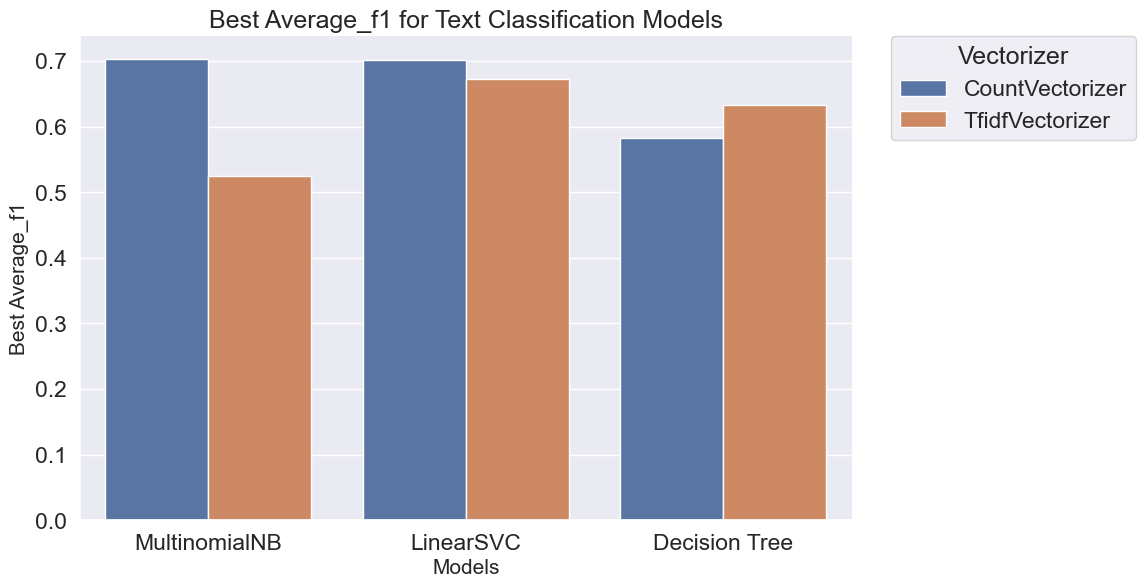

In [31]:
import seaborn as sns

# create a dataframe for the best results (as seen in the table above)
best_results_df = pd.DataFrame({
    'Model': ['MultinomialNB', 'MultinomialNB', 'LinearSVC', 'LinearSVC', 'Decision Tree', 'Decision Tree'],
    'Vectorizer': ['CountVectorizer', 'TfidfVectorizer', 'CountVectorizer', 'TfidfVectorizer', 'CountVectorizer', 'TfidfVectorizer'],
    'Best Average_f1': [0.703, 0.525, 0.702, 0.673, 0.583, 0.633],
    'Run-Time': [4, 4, 2, 5, 7.30, 4.20]
})

# set the style for the plot
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# create the bar plot
best_results_bar = sns.catplot(
    x='Model', 
    y='Best Average_f1', 
    hue='Vectorizer', 
    data=best_results_df, 
    kind='bar', 
    legend=False, 
    palette='deep', 
    alpha=1, 
    height=6, 
    aspect=1.5
)

# set the labels for the plot
best_results_bar.set_xlabels("Models", fontsize=15)
best_results_bar.set_ylabels("Best Average_f1", fontsize=15)

# set the title for the plot
plt.title('Best Average_f1 for Text Classification Models', fontsize=18)

# adjust the legend position
plt.legend(title="Vectorizer", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
        
# show the plot
plt.show()

# <u>Step 4: Prediction:</u>

We found in the previous step that the model that produced the highest <code>Average_f1</code> value is the MultinomialNB model with the CountVectorizer.</br>
Now, all we have left to do is make a prediction on the <code>df_test</code> and display the first and last 5 rows.

## Step 4.1: Tokenization

In [13]:
df_test_tokenized = df_test.copy()
df_test_tokenized['story'] = df_test_tokenized['story'].apply(preprocess_text)

## Step 4.2: Setting a <code>MultinomialNB and CountVectorizer</code> Pipeline

In [17]:
pipeline_train = Pipeline([
    ('vectorizer', CountVectorizer(max_df=0.7, max_features=10000, min_df=3, ngram_range=(1, 2))),
    ('classifier', MultinomialNB(alpha=0.5))
])

pipeline_train.fit(df_train_tokenized['story'], df_train_tokenized['gender'])

Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_df=0.7, max_features=10000, min_df=3,
                                 ngram_range=(1, 2))),
                ('classifier', MultinomialNB(alpha=0.5))])

## Step 4.3: It's Time To Predict!

In [22]:
prediction = pipeline_train.predict(df_test_tokenized['story'])

## Step 4.4: Display The First and Last 5 Rows

In [24]:
df_predicted = pd.DataFrame({
    'test_example_id': df_test_tokenized['test_example_id'],
    'predicted_gender': prediction
})

pd.concat([df_predicted.head(5), df_predicted.tail(5)])

,test_example_id,predicted_gender
0,0,m
1,1,m
2,2,m
3,3,m
4,4,m
318,318,m
319,319,m
320,320,m
321,321,m
322,322,m


### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [25]:
df_predicted.to_csv('classification_results.csv',index=False)